In [1]:
from plotly.offline import init_notebook_mode, iplot
import numpy as np

In [2]:
import plotly 
plotly.tools.set_credentials_file(username='cdesio88', api_key='qhPfEEFgqcHRbYWB17Yc')

init_notebook_mode(connected=True)

### execute this cell to load files on server

In [3]:
detfile = "utilities/km3net_jul13_90m.detx"

In [22]:
nue_st_file = "utilities/km3_v4_nuecc_1.evt.JTE.aa.root"
numu_st_file = "utilities/km3_v4_numucc_1_B.evt.aa.root"

nue_100ns_4hits_file = "utilities/km3_v4_nuecc_1.evt_st_100ns_4hits.JTE.aa.root"
nue_reco_file = "utilities/km3_v4_nuecc_1.evt.JEnergy.aa.root"

numu_100ns_4hits_file = "utilities/km3_v4_numucc_1.evt_st_100ns_4hits.JTE.aa.root"
numu_reco_file = "utilities/km3_v4_nuecc_1.evt.JEnergy.aa.root"

muatm_file = "utilities/km3net_jul13_90m_muatm10T1.km3_v5r2.evt.JTE.aa.root"

In [4]:
numuncfile = "utilities/km3_v4_numuNC_1.evt.JTE.aa.root"
nuencfile = "utilities/km3_v4_nueNC_1.evt.JTE.aa.root"

In [4]:
numu_file = "aafiles/Jpp_v6_aa_files/aa_files_numu_Jpp6/km3_v4_numuCC_1.evt.JTE.aa.root"

### import trees from `aanet`files

In [5]:
from detector_positions import structured_positions
doms, pmts = structured_positions(detfile)

In [6]:
from detector_plot_preparation import plot_simulated_evts

In [8]:
doms_hit_numu, norm_times_numu, muon_positions = plot_simulated_evts(numu_file,
                                                                              detfile, "numu")

trees correctly loaded


In [9]:
doms_hit_nue, norm_times_nue, electron_positions = plot_simulated_evts(nue_st_file, 
                                                                              detfile, "nue")

trees correctly loaded


#### function to plot the mc tracks per event

In [30]:
from utility_plot_functions import plotly_evt_plot

### plot the events using `plotly`

In [32]:
from utility_plot_functions import plotly_evt_plot

In [33]:
import numpy as np

In [38]:
import plotly.plotly as py
import plotly.graph_objs as go


fig = plotly_evt_plot(0, doms_hit_numu, norm_times_numu, muon_positions)
py.iplot(fig)

### plot the detector using `plot.ly`

In [35]:
from utility_plot_functions import plotly_detector_plot

In [9]:
coord_origin = np.asarray((13.887,6.713,405.932))

In [36]:
import plotly.plotly as py
import plotly.graph_objs as go
fig = plotly_detector_plot()
py.iplot(fig)

### utility functions definitions for matplotlib

### plot the events

In [11]:
from utility_plot_functions import mpl_plot_detector

In [18]:
%matplotlib notebook

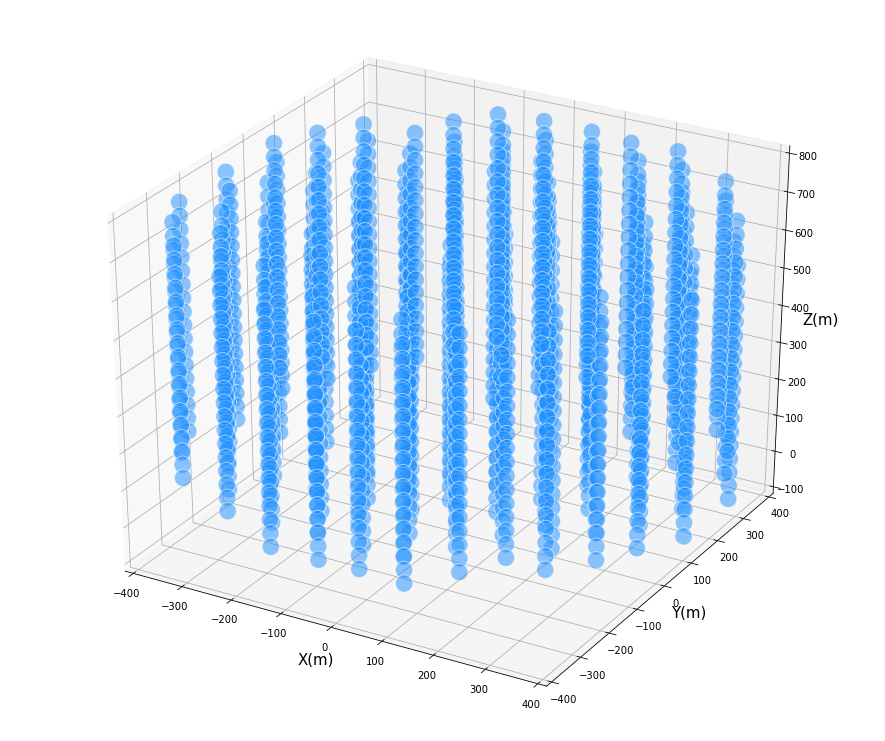

In [20]:
% matplotlib inline
mpl_plot_detector()


In [9]:
from utility_plot_functions import mpl_evt_plot

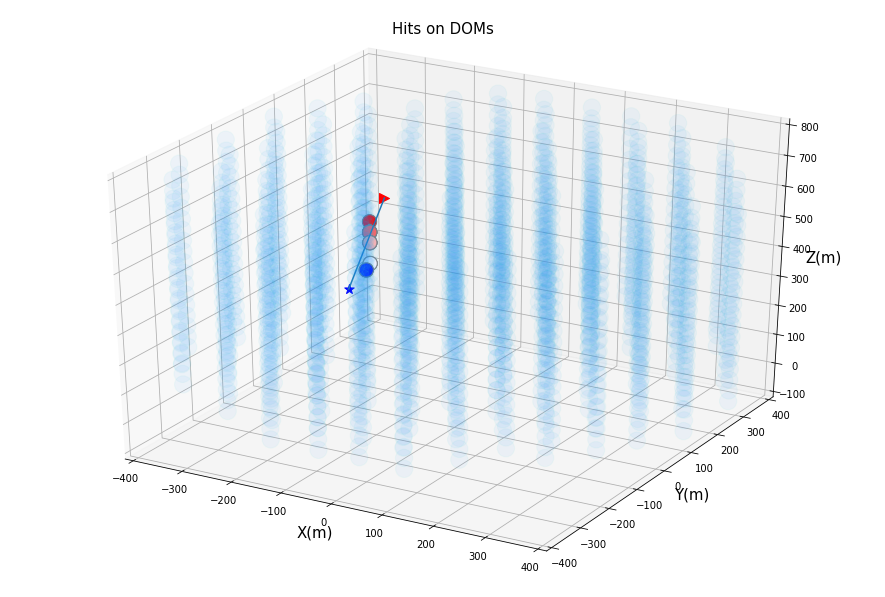

(<mpl_toolkits.mplot3d.art3d.Path3DCollection at 0x7f44cca40110>, None)

In [10]:
mpl_evt_plot(0, doms_hit_numu, norm_times_numu, 
                                    muon_positions)

In [11]:
Xy_distance = np.load("aafiles/Jpp_v6_aa_files/Xy_multi_data_files/Xy_numu_1_sel5_doms.npz")


In [104]:
from distance_from_the_detector_center  import distance_neutrino_detector_centre
from distance_from_the_detector_center import PC

In [103]:
import distance_from_the_detector_center
reload(distance_from_the_detector_center)

<module 'distance_from_the_detector_center' from 'distance_from_the_detector_center.py'>

In [92]:
def distance_calculation(Xy_distance, evt):
    pos_x = Xy_distance["posx"]
    pos_y = Xy_distance["posy"]
    pos_z = Xy_distance["posz"]
    
    P0 = (pos_x[evt],pos_y[evt],pos_z[evt])
    
    dir_x = Xy_distance["dirx"]
    dir_y = Xy_distance["diry"]
    dir_z = Xy_distance["dirz"]
    direct = (dir_x[evt],dir_y[evt],dir_z[evt])

    transl_P0 = [p+c for p,c in zip(P0,PC)] 
    
    dist, point = distance_neutrino_detector_centre(transl_P0, direct)
    print("P0:{}, trans_P0: {}, projection: {}, distance: {}".format(P0, transl_P0, point, dist))
    return dist, point, transl_P0

In [105]:
from distance_from_the_detector_center import distance_cross_product

In [106]:
def distance_calculation(Xy_distance, evt):
    pos_x = Xy_distance["posx"]
    pos_y = Xy_distance["posy"]
    pos_z = Xy_distance["posz"]
    
    P0 = (pos_x[evt],pos_y[evt],pos_z[evt])
    
    dir_x = Xy_distance["dirx"]
    dir_y = Xy_distance["diry"]
    dir_z = Xy_distance["dirz"]
    direct = (dir_x[evt],dir_y[evt],dir_z[evt])

    transl_P0 = [p+c for p,c in zip(P0,PC)] 
    
    dist = distance_cross_product(transl_P0, direct)
    print("distance: {}".format(dist))
    return dist

In [93]:
dist, point, trans_P0 = distance_calculation(Xy_distance, 0)

P0:(-412.23599999999999, 297.43900000000002, -351.08699999999999), trans_P0: [-398.34899999999999, 304.15200000000004, 54.845000000000027], projection: (-269.53186410367749, 204.25551434715587, 426.47774992382205), distance: 346.08008516


In [111]:
dist1 = distance_calculation(Xy_distance, 4)

distance: 285.01064248


In [62]:
dist

346.080085159992

### testing distance calculation

In [87]:
def mpl_evt_plot(evt, doms_hit, norm_times, mc_positions,point,  PC, P0):
    detfile = "utilities/km3net_jul13_90m.detx"
    doms, pmts = structured_positions(detfile)
    
    
    from mpl_toolkits.mplot3d import Axes3D
    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    
    fig = plt.figure(figsize=(12,8))
    fig.suptitle('Hits on DOMs',size=15)
    ax = Axes3D(fig)
    ax.set_xlim(-400,400)
    ax.set_ylim(-400,400)
    ax.set_zlim(-100,800)
    
    ax.set_xlabel('X(m)',size=15)
    ax.set_ylabel('Y(m)',size=15)
    ax.set_zlabel('Z(m)',size=15)
    ax.scatter(doms['x'], doms['y'], doms['z'], color="dodgerblue" , alpha=0.05, s=300, edgecolors='turquoise')
    
    def scatter(evt, doms_hit, times):#, color=(random.random(), random.random(), random.random())):
      
        """
        Function to plot a numucc event as the hit doms in the evt.
        The color scale from blue to red shows the hit times. Event starts at blue and ends in red

        Parameters:
        -----------
        evt : np.int
             event id to plot
        doms_hit : np.ndarray
            array containing the doms hit positions per event
        times : np.ndarray
            array containing the times of the hits 
        
        Returns:
        --------
        scatter : matplotlib ax.scatter
            scatter plot of the chosen event  
        """
    
        return ax.scatter(doms_hit[evt]['x'],
                          doms_hit[evt]['y'],
                          doms_hit[evt]['z'],
            color=cm.bwr(norm_times[evt]),s=200, alpha=0.9, edgecolor="gray")
    
    def mc_points(evt, mc_positions):
       
        """
        Function to plot the mc event: start point, end point, track
        The color scale from blue to red shows the hit times. Event starts at blue and ends in red

        Parameters:
        -----------
        evt : np.int
             event id to plot
        mc_positions : np.ndarray
            numpy array of the 3D positions of the mc events: mc_positions[0] is the start positions; mc_positions[1] 
            is the ending position of the track
        Returns:
        --------
    
        """
        start = ax.scatter(mc_positions[0][evt]['x'], mc_positions[0][evt]['y'], mc_positions[0][evt]['z'], 
                           color="blue", marker = '*', s=100), 
        end = ax.scatter(mc_positions[1][evt]['x'], mc_positions[1][evt]['y'], mc_positions[1][evt]['z'], 
                         color="red", marker = '>',  s=100)
        #arrows = ax.quiver(mu_start[evt]['x'], mu_start[evt]['y'], mu_start[evt]['z'], 
        #                  mu_end[evt]['x'], mu_end[evt]['y'], mu_end[evt]['z'], length=trks_len[evt])
        lines = ax.plot([mc_positions[0][evt]['x'], mc_positions[1][evt]['x']],
                        [mc_positions[0][evt]['y'], mc_positions[1][evt]['y']], 
                        zs=[mc_positions[0][evt]['z'], mc_positions[1][evt]['z']])
        ax.scatter(point[0], point[1], [point[2]], color="orange", s=30)
        ax.scatter(PC[0], PC[1], PC[2], color="red", s = 30)
        ax.scatter(P0[0], P0[1],P0[2], color="green", s=30)
        print("transl_P0:{}, mc_positions:{}".format(P0, (mc_positions[0][evt]['x'], 
                                                                mc_positions[0][evt]['y'], 
                                                                mc_positions[0][evt]['z'])))
        
        return
    
    
    def event(evt):
    
        """
        Function to plot a numucc event as the hit doms in the evt.
        The color scale from blue to red shows the hit times. Event starts at blue and ends in red

        Parameters:
        -----------
        evt : np.int
             event id to plot
        Returns:
        --------
        plot : matplotlib scatter
            scatter plot of the chosen numucc event  
        mc : mc_points 
            scatter plot of start and end position according to mc and line to display the mc track
        """
      
        plot = scatter(evt, doms_hit, norm_times)
        mc = mc_points(evt, mc_positions)
        plt.show()
        return plot, mc
    return event(evt)

In [123]:
evt = 532

distance: 11.893689896
transl_P0:[230.148, -141.55100000000002, 106.07499999999999], mc_positions:(696.952, 186.03399999999999, 274.80500000000001)


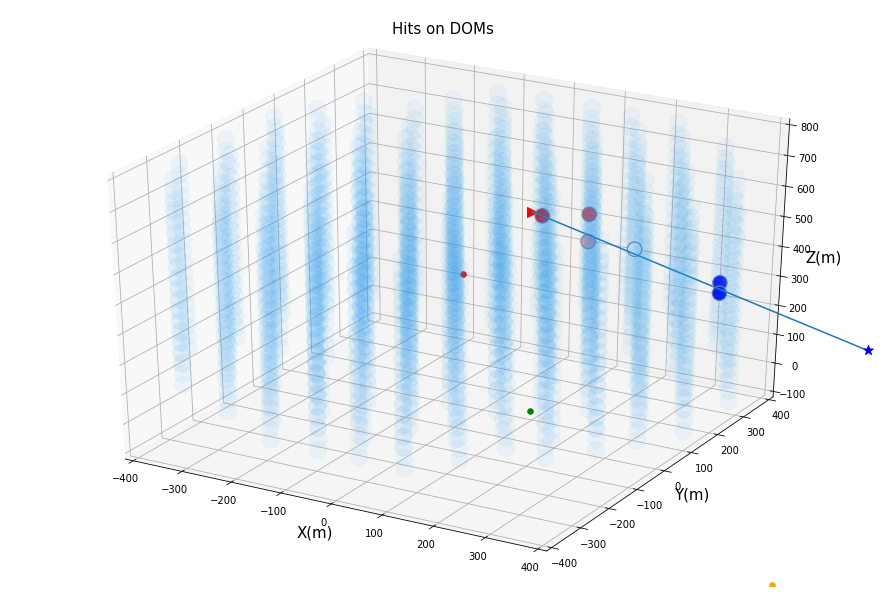

(<mpl_toolkits.mplot3d.art3d.Path3DCollection at 0x7f448e7b6450>, None)

In [124]:
dist1 = distance_calculation(Xy_distance, evt)


mpl_evt_plot(evt, doms_hit_numu, norm_times_numu, 
                                    muon_positions, point, PC, trans_P0)